# Demo: test of the random walk hypothesis for a share

The next section sets up the environment.

In [9]:
!pip -q install yfinance
!pip -q install matplotlib
!pip -q install statsmodels
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import adfuller

The next section downloads some data.

In [10]:
def download_financial_data(ticker):
    data = yf.download(ticker, start="2023-01-01", end="2024-01-01")
    daily_price = data['Close']
    return daily_price

meta_share_price = download_financial_data('META')

[*********************100%%**********************]  1 of 1 completed


Below we get a simple vis.

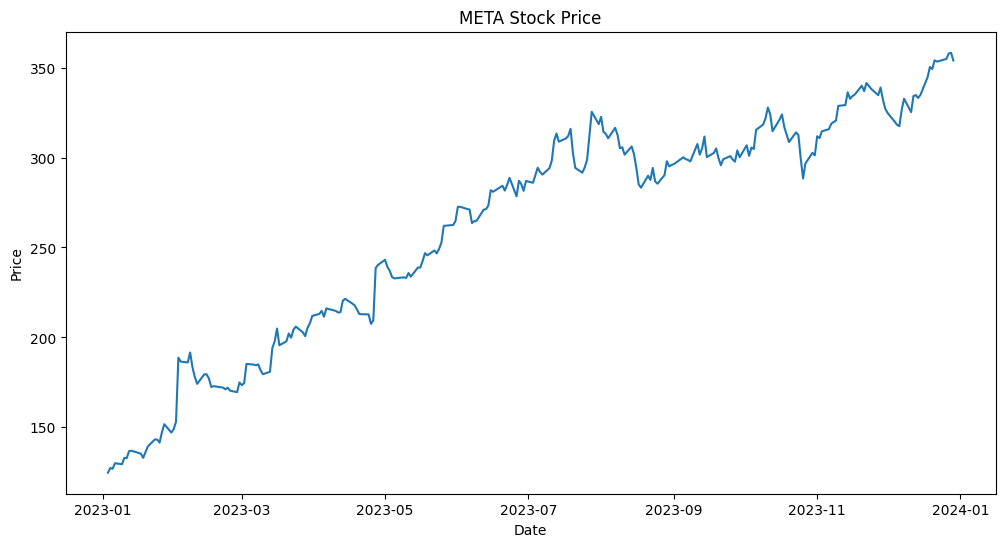

In [11]:
plt.figure(figsize=(12, 6))
plt.plot(meta_share_price)
plt.title('META Stock Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()



Here are some stats on the share price.

In [12]:
descriptive_stats = meta_share_price.describe()
print("Descriptive Statistics for META Stock Prices:")
print(descriptive_stats)


Descriptive Statistics for META Stock Prices:
count    250.000000
mean     261.424280
std       63.121777
min      124.739998
25%      209.919994
50%      286.384995
75%      311.717499
max      358.320007
Name: Close, dtype: float64


Data states are also shown below for daily returns.

In [13]:
daily_returns = meta_share_price.pct_change()
descriptive_stats_returns = daily_returns.describe()
print("\nDescriptive Statistics for META Daily Returns:")
print(descriptive_stats_returns)


Descriptive Statistics for META Daily Returns:
count    249.000000
mean       0.004493
std        0.025090
min       -0.045479
25%       -0.009238
50%        0.001737
75%        0.015084
max        0.232824
Name: Close, dtype: float64


Here are the returns on a plot.

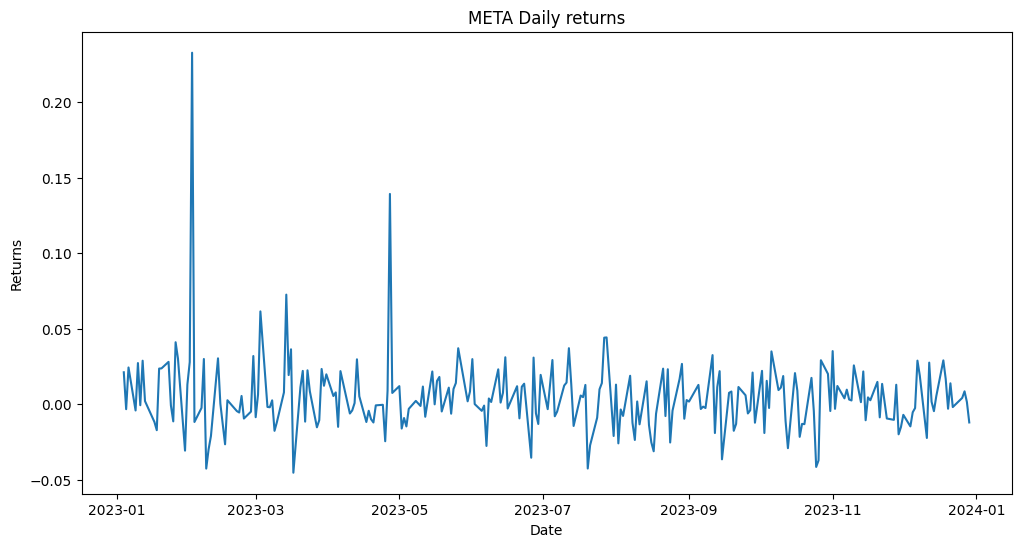

In [14]:
plt.figure(figsize=(12, 6))
plt.plot(daily_returns)
plt.title('META Daily returns')
plt.xlabel('Date')
plt.ylabel('Returns')
plt.show()



A random walk is characterized by the presence of a specific type of nonstationarity called stochastic trend, and by the absence of autocorrelation.

A lack of autocorrelation is inferred from the folowing ACF plot:

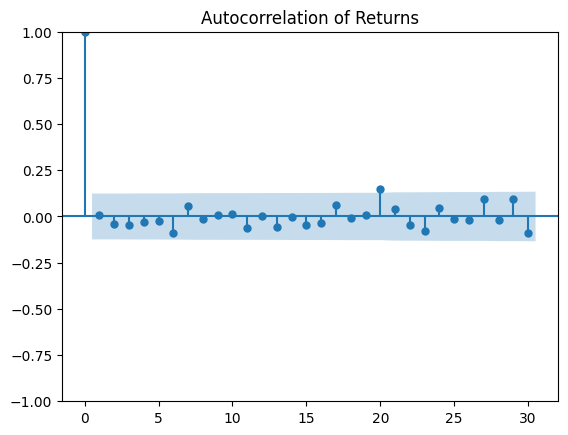

In [15]:

plot_acf(daily_returns.dropna(), lags=30, alpha=0.05)
plt.title('Autocorrelation of Returns')
plt.show()

On the other hand, stochastic trend, also known as the presence of a root unit, is tested with the ADF statistics:

In [16]:
adf_test_result = adfuller(daily_returns.dropna())

print(f"ADF Test Statistic: {adf_test_result[0]}")
print(f"p-value: {adf_test_result[1]}")
print(f"Number of Lags Used: {adf_test_result[2]}")
print(f"Number of Observations Used: {adf_test_result[3]}")
print("Critical Values:")
for key, value in adf_test_result[4].items():
    print(f"    {key}: {value}")
print(f"Maximized Information Criterion: {adf_test_result[5]}")

if adf_test_result[1] < 0.05:
    print("The series lacks an unit root and certainly does not follow a random walk.")
else:
    print("The series has an unit root and likely follows a random walk.")


ADF Test Statistic: -15.550083272099435
p-value: 2.1054784393358533e-28
Number of Lags Used: 0
Number of Observations Used: 248
Critical Values:
    1%: -3.4569962781990573
    5%: -2.8732659015936024
    10%: -2.573018897632674
Maximized Information Criterion: -1041.6887732731996
The series lacks an unit root and certainly does not follow a random walk.


A small p value in the ADF test suggests that the data series does not have a root unit, or, in other words, lacks stochastic trend. Additionaly, the absence of stochastic trend is evidence sufficient for reejcting the random walk hypothesis.